In [64]:
import pickle

# Función para cargar los archivos pkl
def load_shap_data(model_name, file_path_summary, file_path_values):
    """
    Carga los datos SHAP para un modelo dado desde los archivos especificados.
    
    Parámetros:
    model_name (str): Nombre del modelo.
    file_path_summary (str): Ruta al archivo de resumen SHAP.
    file_path_values (str): Ruta al archivo de valores SHAP.
    
    Retorna:
    tuple: resumen y valores SHAP cargados.
    """
    with open(file_path_summary, 'rb') as f:
        shap_summary = pickle.load(f)
    
    with open(file_path_values, 'rb') as f:
        shap_values = pickle.load(f)
    
    return shap_summary, shap_values

# Lista de modelos
modelos = [
    "ElasticNet", "Lasso", "Ridge", "SVRlineal",  # Modelos lineales
    "KernelRidge", "SVRkernel",  # Modelos Kernel
    "KNN", "BaggedKNN",  # Modelos KNN
    "RandomForest", "XGBoost", "CatBoost",  # Modelos basados en árboles
    "MLP",  # Redes neuronales   
    #"Dummy"  # Modelo de referencia
]


# Diccionario para almacenar los datos SHAP de cada modelo
shap_data = {}

# Cargar los datos SHAP para cada modelo
for modelo in modelos:
    shap_summary, shap_values = load_shap_data(
        modelo, 
        f'{modelo}/results_model/multiple_shap_summary_sorted_CN.pkl', 
        f'{modelo}/results_model/multiple_shap_values_CN.pkl'
    )
    shap_data[modelo] = {
        'summary': shap_summary,
        'values': shap_values
    }

# Ejemplo de acceso a los datos para el modelo "BaggedKNN"
shap_summary_baggedknn = shap_data["BaggedKNN"]['summary']
shap_values_baggedknn = shap_data["BaggedKNN"]['values']

# Aquí puedes trabajar con los datos cargados para cada modelo


In [65]:
# Diccionario para almacenar los resultados SHAP
grupos_shap = {}

# Cargar los datos SHAP para cada modelo y construir el diccionario
for modelo in modelos:
    shap_summary, _ = load_shap_data(
        modelo, 
        f'{modelo}/results_model/multiple_shap_summary_sorted_CN.pkl', 
        f'{modelo}/results_model/multiple_shap_values_CN.pkl'
    )
    grupos_shap[modelo] = dict(shap_summary)

# Ahora `grupos_shap` contiene los diccionarios de SHAP para todos los modelos


In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle
# Convertir los diccionarios a un DataFrame
df_shap = pd.DataFrame(grupos_shap).fillna(0)  # Rellenar valores faltantes con 0


In [67]:
# Calcular la correlación de Spearman
correlation_matrix = df_shap.corr(method='spearman')

# Mostrar la matriz de correlación
print(correlation_matrix)

              ElasticNet     Lasso     Ridge  SVRlineal  KernelRidge  \
ElasticNet      1.000000  0.909576  0.997267   0.518811     0.403209   
Lasso           0.909576  1.000000  0.908869   0.537559     0.353688   
Ridge           0.997267  0.908869  1.000000   0.511544     0.398418   
SVRlineal       0.518811  0.537559  0.511544   1.000000     0.476783   
KernelRidge     0.403209  0.353688  0.398418   0.476783     1.000000   
SVRkernel       0.278249  0.232234  0.272075   0.191813     0.517815   
KNN             0.107949  0.049778  0.104412   0.058653     0.343463   
BaggedKNN       0.045694 -0.001672  0.044054   0.048170     0.342080   
RandomForest    0.402084  0.333140  0.399479   0.226124     0.486012   
XGBoost         0.434112  0.384108  0.430028   0.255708     0.536433   
CatBoost        0.282044  0.220336  0.283812   0.070165     0.419287   
MLP             0.357901  0.336292  0.353656   0.391504     0.500289   

              SVRkernel       KNN  BaggedKNN  RandomForest   XG

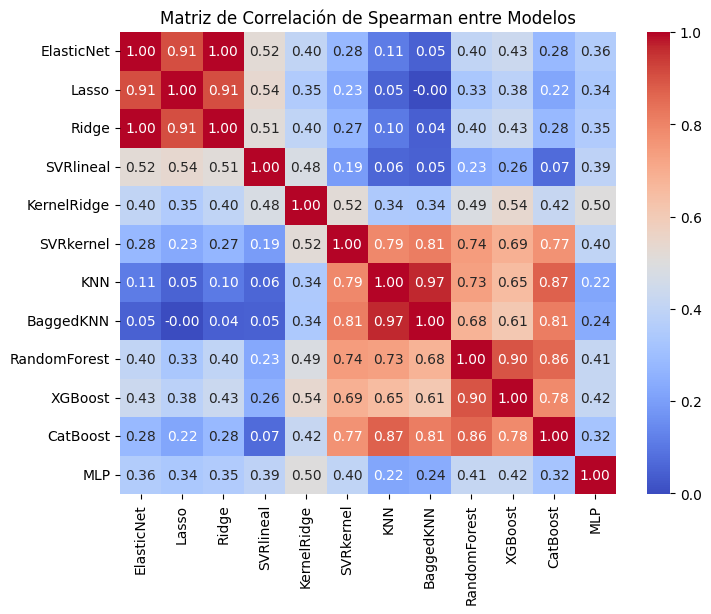

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Spearman entre Modelos")
plt.show()


In [69]:
correlation_matrix_pearson = df_shap.corr(method='pearson')
print(correlation_matrix_pearson)


              ElasticNet     Lasso     Ridge  SVRlineal  KernelRidge  \
ElasticNet      1.000000  0.960976  0.999370   0.521008     0.435645   
Lasso           0.960976  1.000000  0.962968   0.536708     0.441762   
Ridge           0.999370  0.962968  1.000000   0.517567     0.432532   
SVRlineal       0.521008  0.536708  0.517567   1.000000     0.644128   
KernelRidge     0.435645  0.441762  0.432532   0.644128     1.000000   
SVRkernel       0.146188  0.152946  0.144241   0.447347     0.625118   
KNN             0.056987  0.051822  0.055331   0.260935     0.502963   
BaggedKNN       0.028824  0.033215  0.027165   0.305211     0.502406   
RandomForest    0.167621  0.177829  0.165071   0.352422     0.624244   
XGBoost         0.192583  0.222019  0.193249   0.345100     0.648507   
CatBoost        0.070690  0.069986  0.068488   0.277233     0.577791   
MLP             0.404268  0.405341  0.401849   0.644710     0.747184   

              SVRkernel       KNN  BaggedKNN  RandomForest   XG

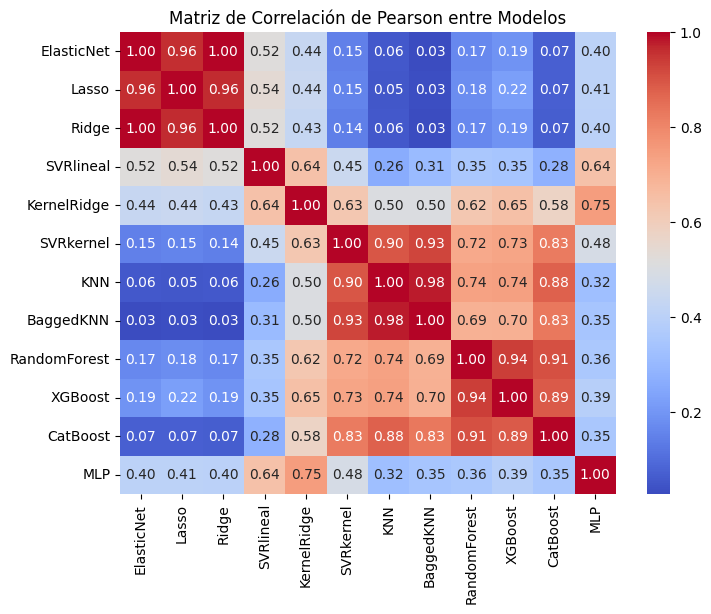

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Pearson entre Modelos")
plt.show()


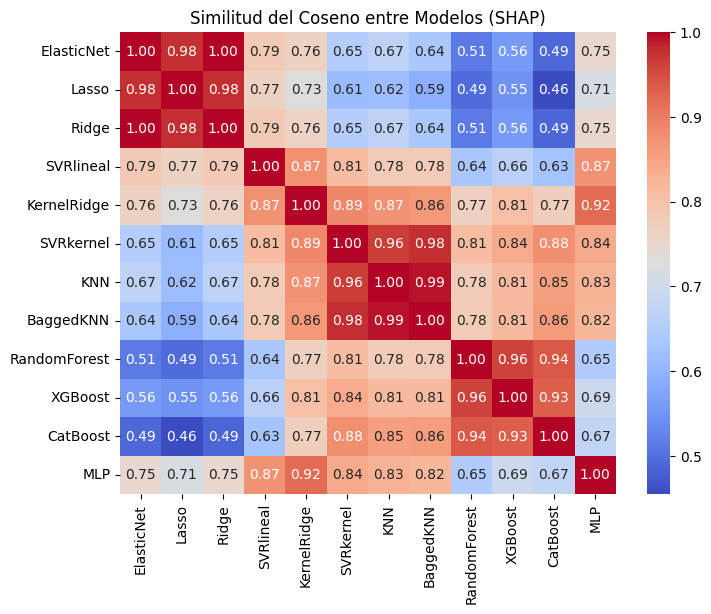

In [71]:
from scipy.spatial.distance import pdist, squareform

# Calcular distancia del coseno (1 - similitud coseno)
cosine_dist = pdist(df_shap.T, metric='cosine')
cosine_sim = 1 - squareform(cosine_dist)  # Convertir distancia a similitud

# Convertir en DataFrame
cosine_df = pd.DataFrame(cosine_sim, index=df_shap.columns, columns=df_shap.columns)

# Graficar
plt.figure(figsize=(8,6))
sns.heatmap(cosine_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Similitud del Coseno entre Modelos (SHAP)")
plt.show()


In [72]:
def calcular_suma_shap_por_grupo(shap_dict):
    """
    Calcula la suma de los valores SHAP por subregión para un grupo dado.
    
    Parámetros:
    shap_dict (dict): Diccionario que contiene los valores SHAP para cada grupo.

    Retorna:
    dict: Diccionario con la suma de los valores SHAP por subregión.
    """
    # Definir las regiones como listas
    OCC_left = [
        'Low_subj_spec_EPP_OCC_left', 'IAF_OCC_left', 'Alpha2_canon_EPP_OCC_left', 
        'Alpha2_canon_RPD_OCC_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left'
    ]

    OCC_right = [
        'Low_subj_spec_EPP_OCC_right', 'IAF_OCC_right', 'Alpha2_canon_EPP_OCC_right', 
        'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_OCC_right'
    ]

    HPC_left = [
        'Low_subj_spec_RPD_HPC_left', 'IAF_HPC_left', 'Low_subj_spec_EPP_HPC_left', 
        'TF_HPC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 
        'High_subj_spec_EPP_HPC_left', 'High_subj_spec_RPD_HPC_left'
    ]

    HPC_right = [
        'Low_subj_spec_RPD_HPC_right', 'IAF_HPC_right', 'Alpha2_canon_EPP_HPC_right', 
        'Alpha2_canon_RPD_HPC_right', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_RPD_HPC_right', 
        'TF_HPC_right'
    ]

    PARIET_left = [
        'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 
        'High_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_left', 
        'Low_subj_spec_RPD_PARIET_left'
    ]

    PARIET_right = [
        'Low_subj_spec_RPD_PARIET_right', 'Alpha2_canon_EPP_PARIET_right', 
        'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 
        'Low_subj_spec_EPP_PARIET_right', 'High_subj_spec_RPD_PARIET_right'
    ]

    CING_left = [
        'Low_subj_spec_EPP_CING_left', 'Alpha2_canon_RPD_CING_left', 
        'High_subj_spec_EPP_CING_left', 'High_subj_spec_RPD_CING_left', 
        'Low_subj_spec_RPD_CING_left'
    ]

    CING_right = [
        'Low_subj_spec_EPP_CING_right', 'Alpha2_canon_RPD_CING_right', 
        'High_subj_spec_EPP_CING_right', 'High_subj_spec_RPD_CING_right', 
        'Low_subj_spec_RPD_CING_right'
    ]

    ORB_left = ['IAF_ORB_left', 'TF_ORB_left']
    ORB_right = ['IAF_ORB_right', 'TF_ORB_right']

    INS_left = ['IAF_INS_left', 'TF_INS_left']
    INS_right = ['IAF_INS_right', 'TF_INS_right']

    IFG_left = ['TF_IFG_left', 'IAF_IFG_left']
    IFG_right = ['TF_IFG_right', 'IAF_IFG_right']

    SFG_left = ['TF_SFG_left', 'IAF_SFG_left']
    SFG_right = ['TF_SFG_right', 'IAF_SFG_right']

    MFG_left = ['IAF_MFG_left', 'TF_MFG_left']
    MFG_right = ['IAF_MFG_right', 'TF_MFG_right']

    # Lista de regiones
    regiones = [
        OCC_left, OCC_right, HPC_left, HPC_right, 
        PARIET_left, PARIET_right, CING_left, CING_right, 
        ORB_left, ORB_right, INS_left, INS_right, 
        IFG_left, IFG_right, SFG_left, SFG_right, 
        MFG_left, MFG_right
    ]

    # Nombres de las regiones
    nombres_regiones = [
        'OCC_left', 'OCC_right', 'HPC_left', 'HPC_right', 
        'PARIET_left', 'PARIET_right', 'CING_left', 'CING_right', 
        'ORB_left', 'ORB_right', 'INS_left', 'INS_right', 
        'IFG_left', 'IFG_right', 'SFG_left', 'SFG_right', 
        'MFG_left', 'MFG_right'
    ]
    
    # Diccionario para almacenar las sumas de SHAP por subregión
    shap_sumas_subregion = {}

    # Iterar sobre cada subregión y sumar los valores SHAP
    for nombre, subregion in zip(nombres_regiones, regiones):
        suma_shap = 0
        for elemento in subregion:
            if elemento in shap_dict:
                suma_shap += shap_dict[elemento]
        
        # Guardar la suma en el diccionario con el nombre de la subregión
        shap_sumas_subregion[nombre] = suma_shap

    return shap_sumas_subregion

# Definir los diccionarios de SHAP para cada grupo
# grupos_shap = {
#     'BaggedKNN': dict(multiple_shap_summary_sorted_BaggedKNN),
#     'CatBoost': dict(multiple_shap_summary_sorted_CatBoost),
#     'ElasticNet': dict(multiple_shap_summary_sorted_ElasticNet),
#     'KernelRidge': dict(multiple_shap_summary_sorted_KernelRidge),
#     'KNN': dict(multiple_shap_summary_sorted_KNN),
#     'Lasso': dict(multiple_shap_summary_sorted_Lasso),
#     'MLP': dict(multiple_shap_summary_sorted_MLP),
#     'RandomForest': dict(multiple_shap_summary_sorted_RandomForest),
#     'SVR': dict(multiple_shap_summary_sorted_SVR),
#     'XGBoost': dict(multiple_shap_summary_sorted_XGBoost),
#     'Ridge': dict(multiple_shap_summary_sorted_Ridge),
#     'BayesianRidge': dict(multiple_shap_summary_sorted_BayesianRidge)
# }

# Diccionario para almacenar los resultados de las sumas de SHAP por subregión
resultados_suma_shap_region = {}

# Iterar sobre cada grupo y calcular la suma de SHAP por subregión
for grupo, shap_dict in grupos_shap.items():
    resultados_suma_shap_region[grupo] = calcular_suma_shap_por_grupo(shap_dict)

# Imprimir resultados
for grupo, sumas in resultados_suma_shap_region.items():
    print(f"Suma de SHAP por subregión para el grupo {grupo}:")
    for subregion, suma in sumas.items():
        print(f"  {subregion}: {suma}")
    print("\n")


Suma de SHAP por subregión para el grupo ElasticNet:
  OCC_left: 22404.624143980927
  OCC_right: 9953.300475993661
  HPC_left: 13980.762535774746
  HPC_right: 7829.177527698287
  PARIET_left: 14193.609209061578
  PARIET_right: 11470.600062311567
  CING_left: 19808.723880413832
  CING_right: 9795.578780529162
  ORB_left: 1943.4909945636164
  ORB_right: 1802.3921323953418
  INS_left: 2164.6052824971093
  INS_right: 2865.380436602527
  IFG_left: 970.8796465564506
  IFG_right: 2692.7526181856133
  SFG_left: 1666.2634264393437
  SFG_right: 863.8119717260586
  MFG_left: 1361.326064144797
  MFG_right: 3220.1136582941253


Suma de SHAP por subregión para el grupo Lasso:
  OCC_left: 22519.703663058404
  OCC_right: 8619.339140362354
  HPC_left: 12150.919417243866
  HPC_right: 4882.330628569052
  PARIET_left: 13170.945168537386
  PARIET_right: 8535.476222052948
  CING_left: 17069.978986357106
  CING_right: 8504.89509460577
  ORB_left: 1861.3929521146301
  ORB_right: 1692.2658172106994
  INS_left:

In [73]:
df_shap_region = pd.DataFrame(resultados_suma_shap_region).fillna(0)  # Rellenar valores faltantes con 0


In [74]:
df_shap_region = pd.DataFrame(resultados_suma_shap_region).fillna(0)  # Rellenar valores faltantes con 0

# Calcular la correlación de Spearman
correlation_matrix_region = df_shap_region.corr(method='spearman')

# Mostrar la matriz de correlación
print(correlation_matrix_region)

              ElasticNet     Lasso     Ridge  SVRlineal  KernelRidge  \
ElasticNet      1.000000  0.997936  1.000000   0.795666     0.830753   
Lasso           0.997936  1.000000  0.997936   0.818369     0.841073   
Ridge           1.000000  0.997936  1.000000   0.795666     0.830753   
SVRlineal       0.795666  0.818369  0.795666   1.000000     0.775026   
KernelRidge     0.830753  0.841073  0.830753   0.775026     1.000000   
SVRkernel       0.824561  0.832817  0.824561   0.725490     0.880289   
KNN             0.816305  0.814241  0.816305   0.675955     0.882353   
BaggedKNN       0.805986  0.808050  0.805986   0.690402     0.876161   
RandomForest    0.818369  0.826625  0.818369   0.655315     0.931889   
XGBoost         0.812178  0.820433  0.812178   0.640867     0.925697   
CatBoost        0.824561  0.832817  0.824561   0.657379     0.915377   
MLP             0.902993  0.905057  0.902993   0.708978     0.882353   

              SVRkernel       KNN  BaggedKNN  RandomForest   XG

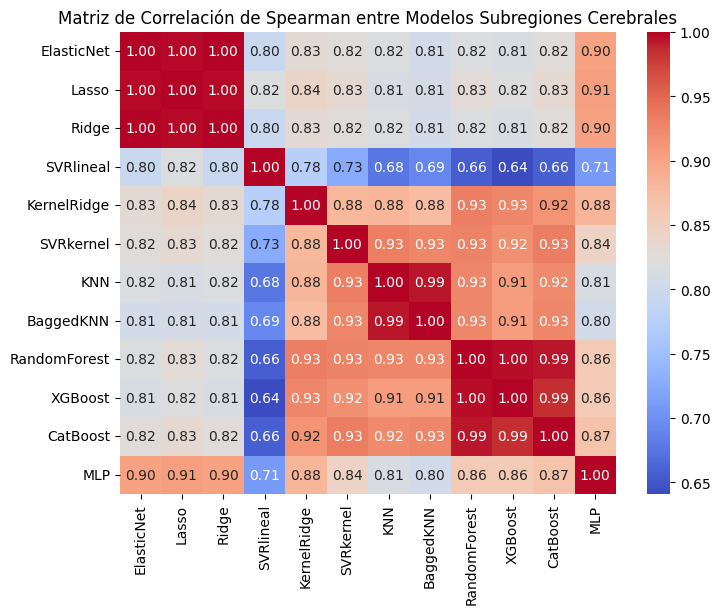

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_region, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Spearman entre Modelos Subregiones Cerebrales")
plt.show()
